In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import collections
import numpy as np

## Technical Modus Operandi

1. Filter down all tweets to only those regionalized in America, and in English
2. Split the tweets into three categories: Retweets, Quotes, and new content
For each of these 3 categories:
A)
    I. Plot frequency of tweets over time (how many were posted over time) to look for local activity spikes
    II. For each spike, first relate them to major [global] events
    III. Plot account_type, account_category over time during the spike time
    IV. Plot word frequency for each account_type to see what topic they were trying to promote
B) Correlation between word_frequency and content length per year

In [12]:
import glob
file_paths = glob.glob('./data/*')
tweet_type_per_file={}
frames = []
for i, p in enumerate(file_paths):
    if i > 5:
        break
    tweets = pd.read_csv(p)
    frames.append(tweets)
big_frame = pd.concat(frames)

In [145]:
tweets = big_frame

In [ ]:
english_tweets = tweets[(tweets['language']=='English') & (tweets['region']=="United States")]

In [41]:
"""
def parse_tweet_type(tweets):
    tweets['tweet_type_response'] = [0] * len(tweets)
    tweets['tweet_type_new_content'] =[0] * len(tweets)
    
    tweets['tweet_type_response'] = tweets.apply(lambda x: 1 if x['content'].find("@") == 0 else 0, axis=1)
    tweets['tweet_type_new_content'] = tweets.apply(lambda x: 0 if x['content'].find("@") == 0  else 1, axis=1)
"""



In [42]:
parse_tweet_type(english_tweets)

/home/glacierpika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/glacierpika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/glacierpika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [70]:
def clean_data(tweets):
    tweets['content'] = tweets['content'].str.lower()

In [73]:
english_tweets['content'] = english_tweets['content'].str.lower()

#c=tweets[['tweet_type_response','tweet_type_new_content', 'retweet','publish_date']]

/home/glacierpika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
english_tweets_retweet = english_tweets[english_tweets['post_type']=='RETWEET']
english_tweets_quote = english_tweets[english_tweets['post_type']=='QUOTE_TWEET']
english_tweets_new_content = english_tweets[english_tweets['retweet']==0]

# New content

In [ ]:
def plot_activity(tweets):
    tweets.index = pd.to_datetime(tweets["publish_date"])
    tweets = tweets.drop(columns=["publish_date"])
    tweet['count'] = [1] * len(tweets)
    tweets[['count']].resample('D').sum().plot()
    tweets[['count']].resample('W').sum().plot()
    tweets[['count']].resample('M').sum().plot()

In [76]:

english_tweets_new_content.index = pd.to_datetime(english_tweets_new_content["publish_date"])

In [83]:
english_tweets_new_content[['count']]

,count
publish_date,
2015-05-25 12:38:00,1
2015-05-25 12:38:00,1
2015-05-25 12:39:00,1
2015-05-25 12:39:00,1
2015-05-25 12:39:00,1
...,...
2016-05-08 18:42:00,1
2016-05-08 18:43:00,1
2016-05-08 18:45:00,1


In [77]:
english_tweets_new_content = english_tweets_new_content.drop(columns=["publish_date"])

In [80]:
english_tweets_new_content['count'] = [1] * len(english_tweets_new_content)

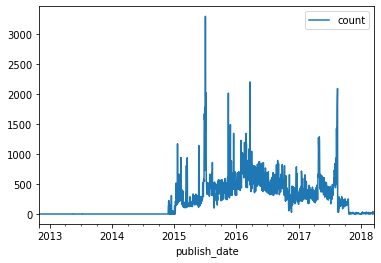

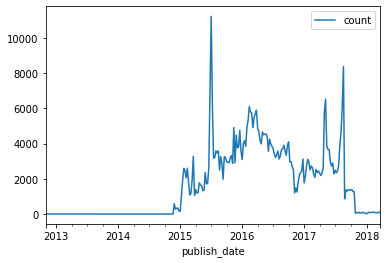

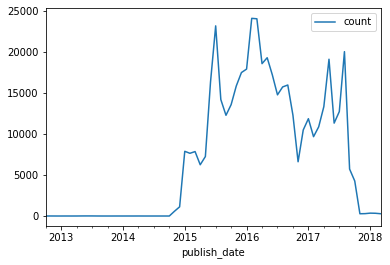

In [81]:
english_tweets_new_content[['count']].resample('D').sum().plot()
english_tweets_new_content[['count']].resample('W').sum().plot()
english_tweets_new_content[['count']].resample('M').sum().plot()

,count
publish_date,
2012-10-31,1
2012-11-30,3
2012-12-31,0
2013-01-31,0
2013-02-28,1
...,...
2017-11-30,276
2017-12-31,290
2018-01-31,350


In [85]:
def word_freq(tweets):
    content_loc= tweets.columns.get_loc("content")
    words = []
    for i in range(len(tweets)):
        c = tweets.iloc[i, content_loc]
        if isinstance(c, str):
            words.append(c.lower().split(" "))
    words = list(itertools.chain(*words))
    counts= collections.Counter(words)
    return counts

In [86]:
counter = word_freq(english_tweets_new_content)

In [115]:
filler_words = [
    '',
    'to',
    'in',
    'the',
    'of',
    'for',
    'a','on','and','is','at','with','after','you','from','as','i',
    'by','be','says','are','this','that','not','over','it','will',
    'who','was','about','have','up','we','more','but','just','rt']

In [87]:
counter.most_common(300)

[('', 192186),
 ('to', 125863),
 ('in', 115794),
 ('#news', 80037),
 ('the', 78716),
 ('of', 72263),
 ('for', 61092),
 ('a', 47336),
 ('on', 43516),
 ('and', 35754),
 ('is', 34083),
 ('#sports', 31732),
 ('at', 29904),
 ('with', 28534),
 ('#world', 27045),
 ('after', 20674),
 ('police', 19017),
 ('you', 18431),
 ('#local', 17017),
 ('new', 16991),
 ('from', 16969),
 ('trump', 16871),
 ('as', 16596),
 ('#politics', 16506),
 ('i', 16449),
 ('man', 16254),
 ('by', 14951),
 ('be', 14754),
 ('#topnews', 14608),
 ('says', 13832),
 ('are', 13614),
 ('this', 13205),
 ('that', 12880),
 ('u.s.', 12604),
 ('not', 12415),
 ('over', 11887),
 ('it', 11461),
 ('will', 11296),
 ('who', 10551),
 ('was', 9262),
 ('about', 9218),
 ('state', 9171),
 ('have', 8865),
 ('up', 8539),
 ('we', 8533),
 ('more', 8395),
 ('but', 8040),
 ('just', 7964),
 ('rt', 7936),
 ('his', 7904),
 ('out', 7898),
 ('\\|', 7805),
 ('my', 7749),
 ('your', 7661),
 ('no', 7602),
 ('what', 7580),
 ('black', 7524),
 ('he', 7452),
 ('h

/home/glacierpika/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/glacierpika/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 12305 missing from current font.
  font.set_text(s, 0, flags=flags)


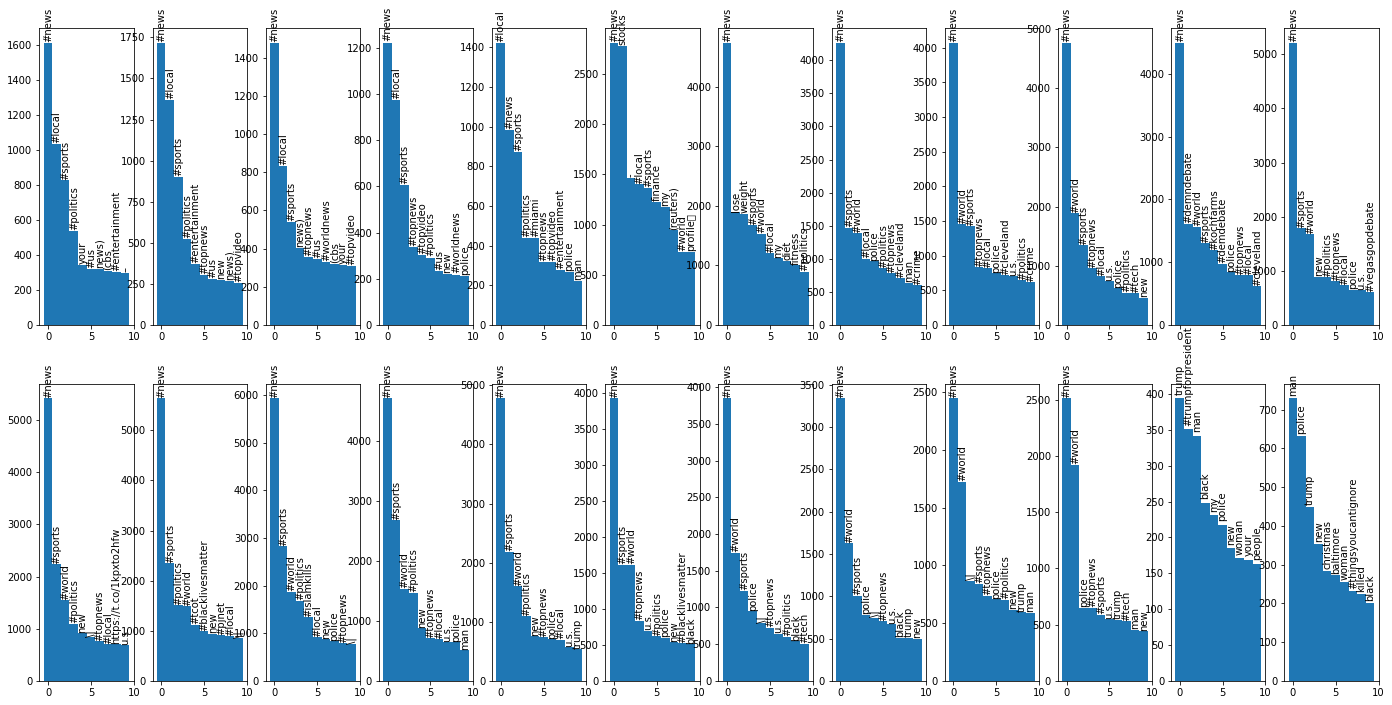

In [117]:
plot_word_freq(english_tweets_new_content)

In [116]:
def plot_word_freq(tweets):
    year_start = tweets.index[0].year
    year_end = tweets.index[-1].year
    fig, ax = plt.subplots(year_end-year_start+1,12,figsize=(24, 12))
    
    for year in range(year_start,year_end+1):
        for month in range(1,13):
            counter = word_freq(
                tweets[
                    (tweets.index.year == year) &
                    (tweets.index.month == month)
                ]
            )
            for w in filler_words:
                del counter[w]
            freqs = counter.most_common(10)

            labels, values = zip(*freqs)

            indexes = np.arange(len(labels))
            width = 1

            ax[year-year_start, month-1].bar(indexes, values, width)
            rects = ax[year-year_start, month-1].patches

            for rect, label in zip(rects, labels):
                height = rect.get_height()
                ax[year-year_start, month-1].text(rect.get_x() + rect.get_width() / 2, height + 5, label,
                ha='center', va='bottom', rotation=90)

In [126]:
def plot_word_freq_by_word(tweets, word_count=10):
    counter = word_freq(
                tweets
            )
    for w in filler_words:
        del counter[w]
    freqs = counter.most_common(word_count)
    
    for w in freqs:
        w = w[0]
        col_name = '{}_count'.format(w)
        print(w)
        tweets[col_name] = tweets.apply(lambda x: 1 if x['content'].find(w) >= 0 else 0, axis=1)
        tweets[[col_name]].resample('M').sum().plot()  

In [122]:
for w in counter


Counter({'i': 16449,
         'hurt': 958,
         'easy,': 19,
         'just': 7964,
         "don't": 4295,
         'show': 2529,
         'it.': 885,
         'you': 18431,
         'can': 5678,
         'someone': 980,
         'and': 35754,
         'not': 12415,
         'even': 1879,
         'know': 3198,
         "who's": 336,
         'got': 2093,
         'the': 78716,
         'worst': 751,
         'make': 4286,
         'up': 8539,
         'ever,': 29,
         'tell': 1021,
         'me,': 234,
         'mirror': 66,
         'jade': 16,
         'doesn`t': 28,
         'love': 2568,
         'her!': 66,
         'https://t.co/feosikho7c': 1,
         'unreal': 10,
         'friendship': 67,
         'may': 3921,
         'turn': 740,
         'to': 125863,
         'real.': 46,
         'but': 8040,
         'real': 1598,
         'friendship,': 7,
         'once': 605,
         'ended,': 6,
         'cannot': 348,
         'be': 14754,
         'mended.': 2,
      

#news
#sports
#world
police
#local
new
trump
#politics
man
#topnews


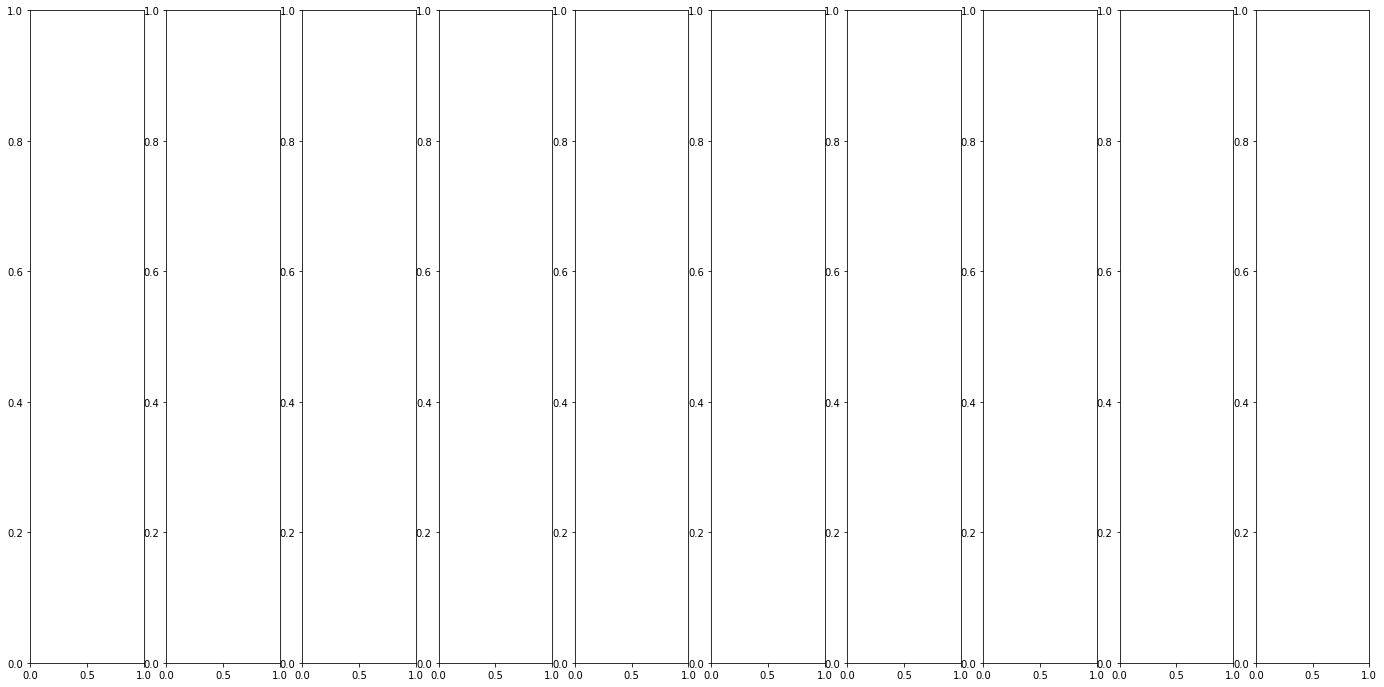

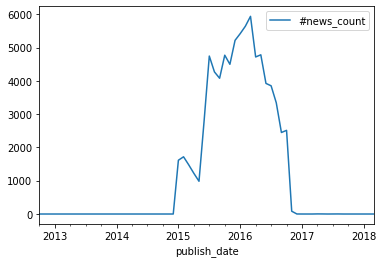

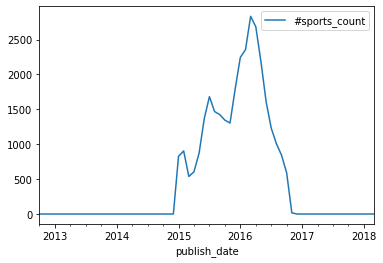

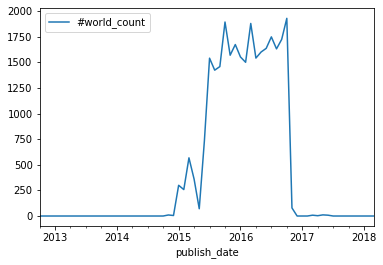

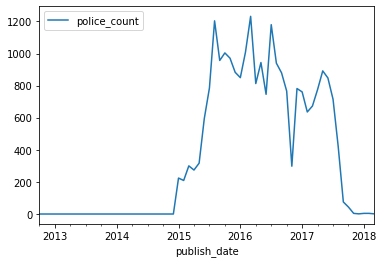

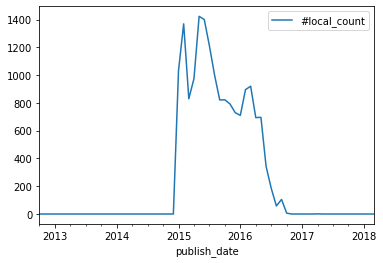

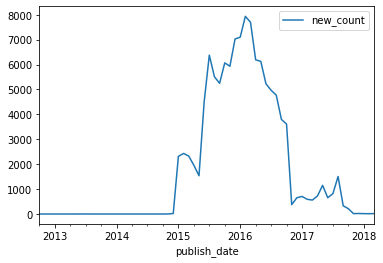

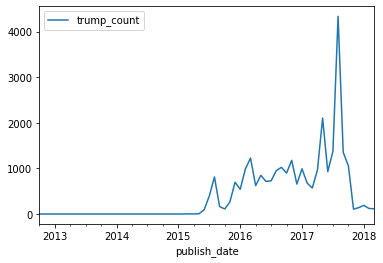

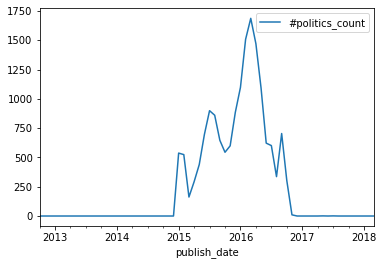

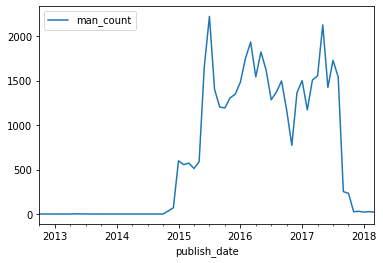

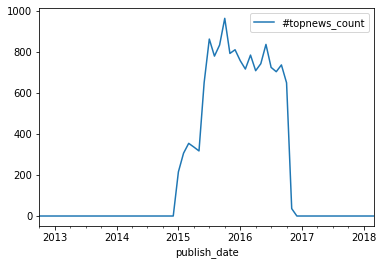

In [127]:
plot_word_freq_by_word(english_tweets_new_content)

In [136]:
def plot_account(tweets):
    tweets['Right_count'] = tweets.apply(lambda x: 1 if x['account_type'] == 'Right' else 0, axis=1)
    tweets['Left_count'] = tweets.apply(lambda x: 1 if x['account_type'] == 'Left' else 0, axis=1)
    tweets['RightTroll_count'] = tweets.apply(lambda x: 1 if x['account_category'] == 'RightTroll' else 0, axis=1)
    tweets['LeftTroll_count'] = tweets.apply(lambda x: 1 if x['account_category'] == 'LeftTroll' else 0, axis=1)
    tweets[['Right_count']].resample('M').sum().plot()  
    tweets[['Left_count']].resample('M').sum().plot()
    tweets[['RightTroll_count']].resample('M').sum().plot()
    tweets[['LeftTroll_count']].resample('M').sum().plot()


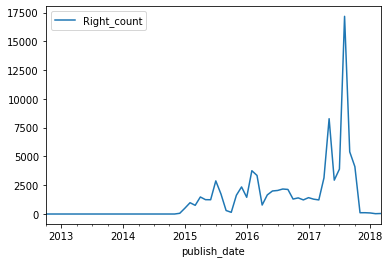

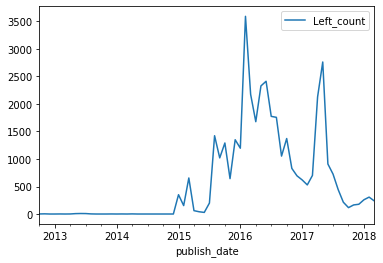

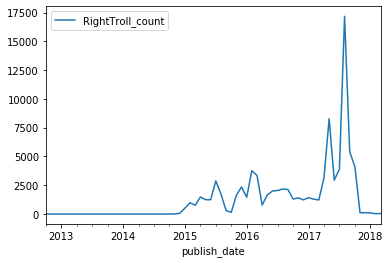

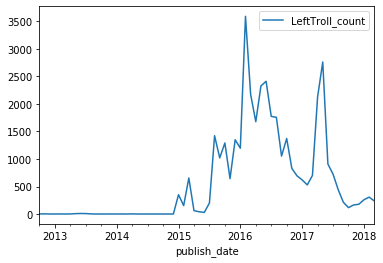

In [137]:
plot_account(english_tweets_new_content)

In [133]:
english_tweets_new_content['account_type'].unique()


array(['Koch', 'Right', 'Left', '?', 'Hashtager', 'Commercial', 'Russian',
       'local', 'news', 'German', 'Ebola ', 'ZAPOROSHIA'], dtype=object)

In [132]:
english_tweets_new_content['account_category'].unique()

array(['Fearmonger', 'RightTroll', 'LeftTroll', 'Unknown', 'HashtagGamer',
       'Commercial', 'NonEnglish', 'NewsFeed'], dtype=object)